# WEEK 6

## Introduction to Scikit-learn


training data, features, labels, and models
Overview of the scikit-learn API and its main classes, including Estimator, Transformer, and Predictor
Examples of how to use scikit-learn to train and evaluate simple machine learning models
Tips on how to preprocess and prepare data for use with scikit-learn
Techniques for evaluating the performance of machine learning models, such as train/test split and cross-validation
Strategies for improving the performance of machine learning models, such as hyperparameter tuning and ensemble methods
Resources for learning more about scikit-learn and machine learning in general.

### Installing Scikit-learn

In [ ]:
#!pip install scikit-learn # If you are using Google Colab
#!conda install -c conda-forge scikit-learn --yes # If you are using your own computer

### Importing Scikit-learn

In [1]:
import sklearn as sk
import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt


### Important basic concepts

**Training data**: In machine learning, we train models using a dataset of examples. This dataset is called the training data. The training data consists of a set of features and labels.

**Features**: A feature is an individual measurable property or characteristic of a phenomenon being observed. In the context of machine learning, features are typically numeric values or strings that represent some aspect of the data. For example, in a dataset of customer information, features might include the customer's age, gender, and income level.

**Labels**: A label is the correct answer for a given example in the training data. In supervised learning, the goal is to train a model to make predictions for new, unseen examples by learning the relationship between the features and labels in the training data. For example, in a dataset of customer information, the label might be whether or not the customer is likely to purchase a particular product.

**Models**: A machine learning model is a mathematical representation of a system or process that is being studied. The model is trained on the training data and is then used to make predictions on new, unseen examples. There are many different types of machine learning models, including linear regression, logistic regression, decision trees, and neural networks. The choice of model depends on the nature of the problem being solved and the type of data being used.

**Estimator**: An estimator is any object that learns from data. This includes machine learning models, as well as utilities for fitting and evaluating models. Estimators implement a fit method, which trains the estimator on a dataset, and a predict method, which makes predictions using the trained model.

**Transformer**: A transformer is an estimator that can transform data. This is often used as a step in a data processing pipeline. Transformers implement a transform method, which takes in a dataset and returns a transformed version of the data.

**Predictor**: A predictor is an estimator that makes predictions based on a trained model. Predictors implement a predict method, which takes in a dataset and returns predictions for each example in the dataset.

## Splitting data

**Splitting data into train and test sets**: To evaluate a machine learning model, it is common to split the data into a training set and a test set. The model is trained on the training set, and then the test set is used to evaluate its performance. scikit-learn provides the train_test_split function for this purpose.

Let's start by loading our dataset from sklearn, like in the previous lesson.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#test_size=0.3 means that 30% of the data is used for testing and 70% for training
#random_state=0 means that the data is split in the same way every time
#This is useful for debugging, but should be removed when you are done
#The data is split randomly, so the results will be different every time
#If you want to get the same results as me, use random_state=0
#If you want to get different results, use random_state=None
#The data is split into 4 variables:
#X_train: The features of the training set
#X_test: The features of the test set
#y_train: The labels of the training set
#y_test: The labels of the test set


Now, let's created a basic predictive model:

In [8]:
# Create a model
from sklearn import neighbors

model = neighbors.KNeighborsClassifier(n_neighbors=3) # You can change this to any model you want


# Train a model on the training data
model.fit(X_train, y_train)
print(model)

# Make predictions on the test data
y_pred = model.predict(X_test)
#y_pred is a list of the predictions for each data point in the test set


KNeighborsClassifier(n_neighbors=3)


# Now, let's evaluate this model according to its accuracy.

In [9]:

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9777777777777777


# Basic Models

## Linear Regression


Linear regression is a simple model that is used to predict a **continuous target** variable based on one or more features. It is a widely used model for **regression tasks** and is implemented in scikit-learn using the LinearRegression class.

## Logistic Regression

Logistic regression is a model that is used to predict a **binary target variable** (i.e., a variable that can take on only two values). It is a widely used model for **classification** tasks and is implemented in scikit-learn using the LogisticRegression class.
In the next example, we will predict the type of flower using the Iris dataset.


In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Iris dataset
x, y = load_iris(return_X_y=True)
#x is a list of the features
#y is a list of the labels (0, 1, or 2), the species of the iris
# 0 = setosa, 1 = versicolor, 2 = virginica
# The features are:
# sepal length in cm
# sepal width in cm
# petal length in cm
# petal width in cm

# Split the data into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Train a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the model's accuracy
accuracy = model.score(x_test, y_test)
print('Accuracy: ', accuracy)


Accuracy:  0.9333333333333333


### Plotting our results

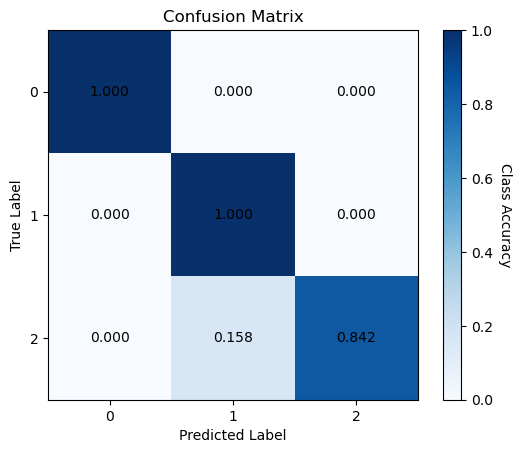

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot the confusion matrix as a heatmap
im = ax.imshow(cm, cmap='Blues')

# Add labels and ticks
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['0', '1', '2'])
ax.set_yticklabels(['0', '1', '2'])

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Class Accuracy', rotation=-90, va="bottom")

# Loop over data dimensions and create text annotations
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, '{:.3f}'.format(cm[i, j]),
                       ha="center", va="center", color="black")

# Set the title
plt.title('Confusion Matrix')

# Show the plot
plt.show()


/home/zow/anaconda3/envs/fintech/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


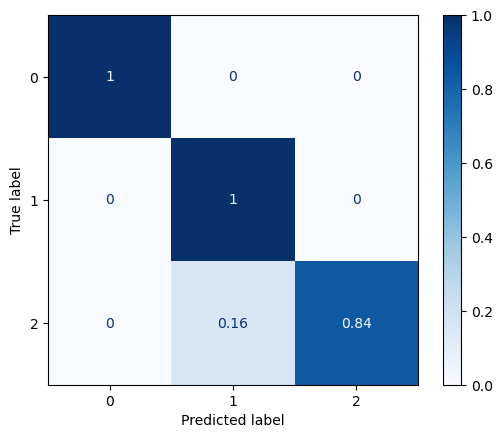

In [13]:
# Another way to plot the confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap='Blues')
plt.show()


### Plot your results

    

    
    Decision trees: Decision trees are a type of model that is used to make decisions based on a series of binary splits in the data. They are widely used for both regression and classification tasks and are implemented in scikit-learn using the DecisionTreeClassifier and DecisionTreeRegressor classes.

    Support vector machines (SVMs): Support vector machines are a type of model that is used for both classification and regression tasks. They are particularly effective for tasks with high-dimensional data, and are implemented in scikit-learn using the SVC and SVR classes.

    Random forests: Random forests are an ensemble learning method that is used for both classification and regression tasks. They are composed of many decision trees that are trained on different subsets of the data, and the predictions of the individual trees are averaged to make the final prediction. Random forests are implemented in scikit-learn using the RandomForestClassifier and RandomForestRegressor classes.